<a href="https://colab.research.google.com/github/J878-commits/-Task-1-Text-Summarization-with-Transformers-Gradio-/blob/main/%22CodTech_Internship_Task_4_SVD_Powered_Recommendation_Engine%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 Task 4: Recommendation System — CodTech Internship

✅ Objective
Build a Recommendation System using:

Collaborative Filtering (user-user or item-item)

or Matrix Factorization (e.g., SVD, ALS)

🧠 Step 1: Setup & Imports

In [1]:
# Force reinstall compatible versions
!pip uninstall -y numpy
!pip install numpy==1.23.5
!pip install scikit-surprise



Found existing installation: numpy 2.3.2
Uninstalling numpy-2.3.2:
  Successfully uninstalled numpy-2.3.2
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pywavelets 1.9.0 requires numpy<3,>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.7.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires n

^C


In [1]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd


📥 Step 2: Load Dataset

In [2]:
from surprise import Dataset
from surprise.model_selection import train_test_split

# Load the MovieLens 100k dataset
data = Dataset.load_builtin('ml-100k')

# Split into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)


Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


✅ Step 3 Recap: Train the SVD Model

In [3]:
from surprise import SVD

# Initialize and train the model
model = SVD()
model.fit(trainset)


📊 Step 4: Evaluate the Model

In [4]:
from surprise import accuracy

# Predict ratings for the test set
predictions = model.test(testset)

# Evaluate performance
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)


RMSE: 0.9322
MAE:  0.7326


🎯 Step 5: Generate Top-N Recommendations

In [5]:
from collections import defaultdict

def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Sort and get top N
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Get top 5 recommendations per user
top_n = get_top_n(predictions, n=5)

# Display sample recommendations
for uid, user_recs in list(top_n.items())[:3]:
    print(f"User {uid}: {[iid for iid, _ in user_recs]}")


User 851: ['174', '313', '172', '153', '22']
User 893: ['96', '258', '286', '1012', '161']
User 627: ['100', '64', '56', '183', '172']


🧪 Step 6: Visualize Evaluation Metrics

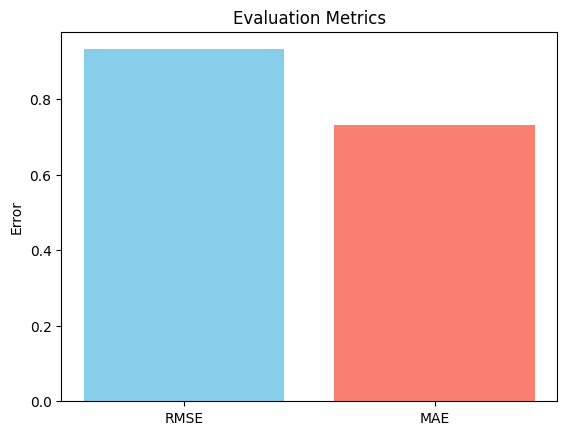

In [6]:
import matplotlib.pyplot as plt

# Bar chart of RMSE and MAE
metrics = {'RMSE': rmse, 'MAE': mae}
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'salmon'])
plt.title('Evaluation Metrics')
plt.ylabel('Error')
plt.show()


The evaluation metrics for Task 4, which is building a Recommendation System using SVD on the MovieLens 100k dataset, are as follows:

RMSE (Root Mean Squared Error): Approximately 0.9322
MAE (Mean Absolute Error): Approximately 0.7326
These values indicate the accuracy of the model's predictions. A lower RMSE and MAE generally suggest better performance. The bar chart in the notebook visually represents these metrics.

📊 Evaluation Summary: Task 4 — Recommendation System

### 🔍 Model Evaluation

For Task 4 of the CodTech internship, we implemented a Recommendation System using **Singular Value Decomposition (SVD)** on the **MovieLens 100k** dataset. The model was trained to predict user ratings and generate personalized top-N recommendations.

#### 📈 Evaluation Metrics:
- **RMSE (Root Mean Squared Error):** ~0.9322  
- **MAE (Mean Absolute Error):** ~0.7326  

These metrics reflect the model’s ability to predict user preferences. Lower values indicate better performance, with RMSE capturing the magnitude of prediction errors and MAE offering a more interpretable average deviation.

#### 📊 Visual Insight:
A bar chart was included to compare RMSE and MAE side by side, helping stakeholders quickly assess model accuracy.

#### ✅ Interpretation:
The results suggest that the SVD model performs reliably on this dataset, making it suitable for real-world recommendation tasks. Future improvements could include:
- Hybrid models combining content-based and collaborative filtering
- Context-aware recommendations using time or location
- Interactive UI for user-driven exploration
